In [3]:
import io
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#uploaded = files.upload()
dataframe = pd.read_csv(io.BytesIO(uploaded['Dataset Final v2.csv']))
dataframe.head()

,id,review,type_review,date,language,views,votes,score,negative,positive,neutral,predominant_label
0,Mamiruiz117,Arruinaron completamente una saga que practica...,normal,2021-03-08,Spanish,3,2,4.0,0.9999,0.0001,0.0,negative
1,tigaw77233,"Lesbianas musculosas peleando.,Pura mierda, to...",expanded,2021-03-02,Spanish,2,1,0.0,0.9998,0.0002,0.0,negative
2,SludgyCannon616,Es un chiste muy mal contado en comparación a ...,normal,2021-02-28,Spanish,2,2,0.0,0.9997,0.0003,0.0,negative
3,Elchicodel_7,Técnicamente es de los mejores de esta generac...,normal,2021-01-25,Spanish,2,2,4.0,0.9998,0.0002,0.0,negative
4,CRISTIXNSIO,Ohflydjtzktflufñufñihñisvñialycauco sñ js ohs ...,normal,2021-01-20,Spanish,3,2,2.0,0.9997,0.0003,0.0,negative


In [4]:
from sklearn.model_selection import train_test_split
regresion_df = dataframe.drop(['id', 'review', 'type_review', 'date', 'language', 'views', 'votes', 'predominant_label'], axis=1 )
regresion_df

,score,negative,positive,neutral
0,4.0,0.999900,0.000100,0.000000
1,0.0,0.999800,0.000200,0.000000
2,0.0,0.999700,0.000300,0.000000
3,4.0,0.999800,0.000200,0.000000
4,2.0,0.999700,0.000300,0.000000
...,...,...,...,...
29613,0.0,0.709934,0.022324,0.267742
29614,0.0,0.534177,0.022895,0.442928
29615,0.0,0.345779,0.041212,0.613009
29616,0.0,0.890091,0.008131,0.101778


In [5]:
regresion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29618 entries, 0 to 29617
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   score     29618 non-null  float64
 1   negative  29618 non-null  float64
 2   positive  29618 non-null  float64
 3   neutral   29618 non-null  float64
dtypes: float64(4)
memory usage: 925.7 KB


In [6]:
regresion_df.describe()

,score,negative,positive,neutral
count,29618.000000,29618.000000,29618.000000,29618.000000
mean,5.150719,0.525346,0.444002,0.021306
std,4.403283,0.488735,0.487979,0.108205
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.001103,0.000495,0.000000
50%,4.000000,0.933959,0.004807,0.000000
75%,10.000000,0.999503,0.998883,0.000000
max,10.000000,0.999900,0.999900,0.932194


In [7]:
train, test = train_test_split(regresion_df, test_size=0.2)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define features and target variable
features = ['negative', 'positive', 'neutral']
target = 'score'

# Model de regressió
model = LinearRegression()
model.fit(train[features], train[target])

# Prediccions sobre el conjunt de test
predictions = model.predict(test[features])

# Càlcul de les mètriques d'error
r2 = r2_score(test[target], predictions)
mse = mean_squared_error(test[target], predictions)
mae = mean_absolute_error(test[target], predictions)
rmse = np.sqrt(mse)

# Coeficients de la regressió
coefficients = model.coef_
intercept = model.intercept_

print("Coeficients de regressió:")
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef}")

print("Intercept de la regressió:", intercept)
print("\nMean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)




Coeficients de regressió:
negative: -8.801966661824963
positive: -1.0088027674939488
neutral: -2.9948938075744644
Intercept de la regressió: 10.290322799695364

Mean Squared Error (MSE): 4.926563930645318
Mean Absolute Error (MAE): 1.4781323750622448
Root Mean Squared Error (RMSE): 2.2195864323439443
R-squared (R^2): 0.7446108238043705


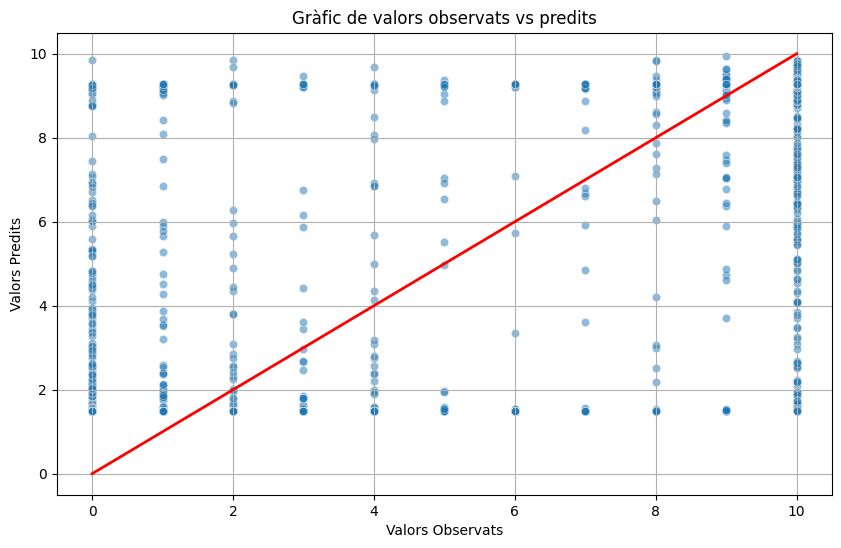

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test[target], y=predictions, alpha=0.5)
plt.plot([test[target].min(), test[target].max()], [test[target].min(), test[target].max()], color='red', lw=2)  # Línia diagonal
plt.title('Gràfic de valors observats vs predits')
plt.xlabel('Valors Observats')
plt.ylabel('Valors Predits')
plt.grid(True)
plt.show()


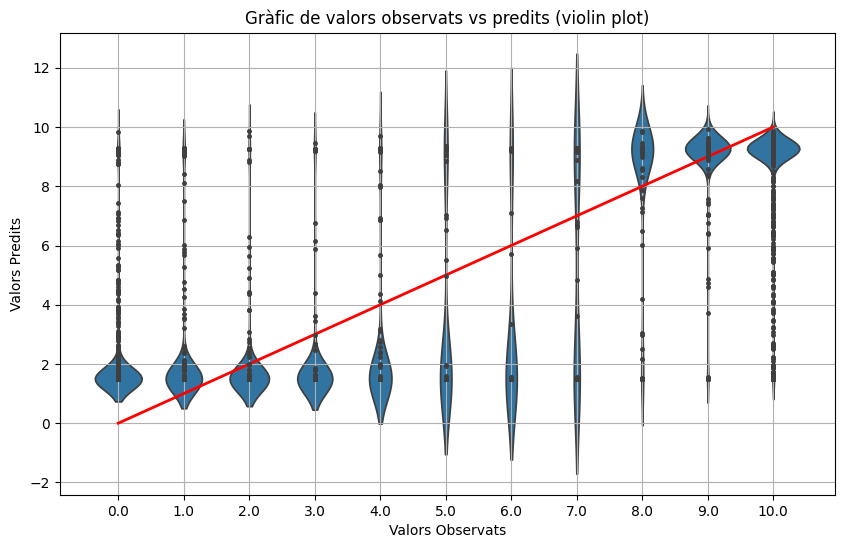

In [10]:
results_df = pd.DataFrame({'Observats': test[target], 'Predits': predictions})

plt.figure(figsize=(10, 6))
sns.violinplot(x='Observats', y='Predits', data=results_df, inner='point')
plt.plot([test[target].min(), test[target].max()], [test[target].min(), test[target].max()], color='red', lw=2)  # Línia diagonal
plt.title('Gràfic de valors observats vs predits (violin plot)')
plt.xlabel('Valors Observats')
plt.ylabel('Valors Predits')
plt.grid(True)
plt.show()



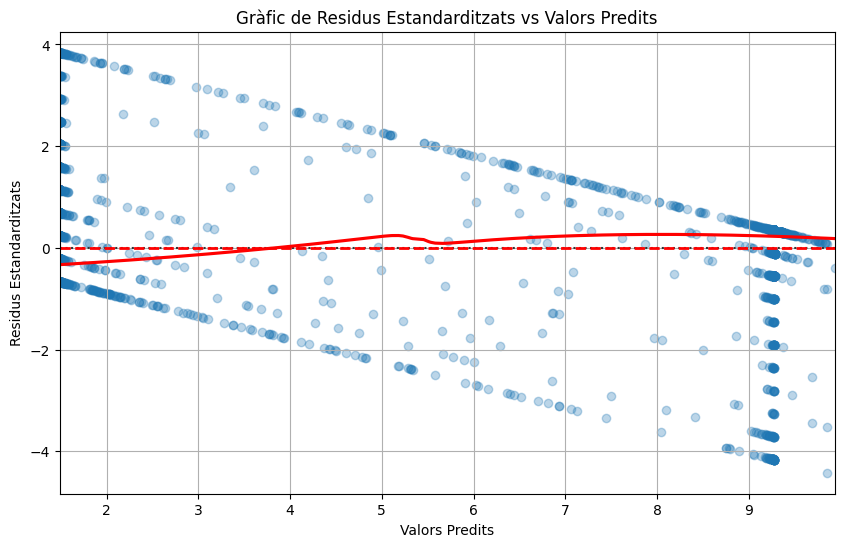

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

features = ['negative', 'positive', 'neutral']
target = 'score'

model = LinearRegression()
model.fit(train[features], train[target])

predictions = model.predict(test[features])
residuals = test[target] - predictions
standardized_residuals = residuals / np.std(residuals)

plt.figure(figsize=(10, 6))
sns.residplot(x=predictions, y=standardized_residuals, lowess=True, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Gràfic de Residus Estandarditzats vs Valors Predits')
plt.xlabel('Valors Predits')
plt.ylabel('Residus Estandarditzats')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.grid(True)
plt.show()


## Cross Validation

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

features = ['negative', 'positive', 'neutral']
target = 'score'

model = LinearRegression()

# Definim la validació creuada amb 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(model, regresion_df[features], regresion_df[target], cv=kf, scoring='r2')
mse_scores = -cross_val_score(model, regresion_df[features], regresion_df[target], cv=kf, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(model, regresion_df[features], regresion_df[target], cv=kf, scoring='neg_mean_absolute_error')

# Calcul de les mitjanes de les puntuacions
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
mean_mae = np.mean(mae_scores)
mean_rmse = np.sqrt(mean_mse)

print("Validació Creuada (5 folds):")
print("Mitjana R-squared (R^2):", mean_r2)
print("Mitjana Mean Squared Error (MSE):", mean_mse)
print("Mitjana Mean Absolute Error (MAE):", mean_mae)
print("Mitjana Root Mean Squared Error (RMSE):", mean_rmse)


Validació Creuada (5 folds):
Mitjana R-squared (R^2): 0.742355166608725
Mitjana Mean Squared Error (MSE): 4.99462812224356
Mitjana Mean Absolute Error (MAE): 1.49948512618741
Mitjana Root Mean Squared Error (RMSE): 2.2348664663114794


## Predicció logarítmica

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(degree=4, include_bias=False)
model_poly = make_pipeline(poly, LinearRegression())

# Validació creuada amb el model polinòmic
r2_scores_poly = cross_val_score(model_poly, regresion_df[features], regresion_df[target], cv=kf, scoring='r2')
mse_scores_poly = -cross_val_score(model_poly, regresion_df[features], regresion_df[target], cv=kf, scoring='neg_mean_squared_error')
mae_scores_poly = -cross_val_score(model_poly, regresion_df[features], regresion_df[target], cv=kf, scoring='neg_mean_absolute_error')

# Calcul de les mitjanes de les puntuacions per al model polinòmic
mean_r2_poly = np.mean(r2_scores_poly)
mean_mse_poly = np.mean(mse_scores_poly)
mean_mae_poly = np.mean(mae_scores_poly)
mean_rmse_poly = np.sqrt(mean_mse_poly)

print("Validació Creuada (5 folds) - Model Polinòmic de Grau 4:")
print("Mitjana R-squared (R^2):", mean_r2_poly)
print("Mitjana Mean Squared Error (MSE):", mean_mse_poly)
print("Mitjana Mean Absolute Error (MAE):", mean_mae_poly)
print("Mitjana Root Mean Squared Error (RMSE):", mean_rmse_poly)


Validació Creuada (5 folds) - Model Polinòmic de Grau 4:
Mitjana R-squared (R^2): 0.7526685417980923
Mitjana Mean Squared Error (MSE): 4.794707156801987
Mitjana Mean Absolute Error (MAE): 1.4608064332343027
Mitjana Root Mean Squared Error (RMSE): 2.1896819761787296
